<a href="https://colab.research.google.com/github/Kakumanu-Harshitha/House-Price-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **House price prediction**



**model description**



This model is about predicting the prices of the house according to the
required featers like no.of bed rooms, bathrooms,stories ,whether the house is located at mainroad or not,guest room facility etc..This model is use ful for real esate field.This data set contains 13 features.This model made customiers easy to predict the prices.


#**steps to build the model**



1.  Importing libraries

2.   Importing dataset

3.   Data Preprocessing

          *   Find and fill the missing value
          *   label encoding
          *   splitting the data into training and test data
          *   Feature scaling
4.  Select the model



5.  Build the model


6.   Evaluate the model


7.   Predict the results


8.   Visualize the results



# 1.Importing Libraries



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2. Importing dataset


Here ,I am importing dataset from Kaggle from the kaggle.we can import from where ever we want.
# REFERNCE:
https://www.kaggle.com/datasets/yasserh/housing-prices-dataset Let's split our data into two parts. Dependent variable prices as 'y' and independent variables as 'x'.


In [ ]:
dataset=pd.read_csv("Housing.csv")

In [ ]:
x=dataset.iloc[:,1:].values
y=dataset.iloc[:,0].values
dataset.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4410000,4900,2,1,2,yes,no,yes,no,no,0,no,semi-furnished
1,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished
2,5110000,6100,3,1,1,yes,no,yes,no,yes,0,yes,semi-furnished
3,3780000,2856,3,1,3,yes,no,no,no,no,0,yes,furnished
4,5810000,5828,4,1,4,yes,yes,no,no,no,0,no,semi-furnished


we can visualize and understand the relations among features.But it will not be helpfull to the predict the data.It just help us to become familar with data

# 3. Data preprocessing

#     Find and fill missing values

In [ ]:
missing_values=dataset.isnull().sum()
print(missing_values)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


As there are no missing values we can skip this step.

Here there are no missing values.So we need not to do the further process.suppose, if missing values are there ,Then we have to fill them with either mean or mode.If missing records are either 2 or 3 then delete them.

# label encoding

some Features like 'mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea' are catagorical .So we need to encode them using label encoding(0,1,2..)



In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
encode_columns=[4,5,6,7,8,10]
for columns in encode_columns:
   x[:,columns]=le.fit_transform(x[:,columns])
ct = ColumnTransformer(
    transformers=[("encoder", OneHotEncoder(), [11])],
    remainder="passthrough")
x = np.array(ct.fit_transform(x))
x=x.astype("float32")
y=y.astype("float32")
print(x[2])


[0.0e+00 1.0e+00 0.0e+00 6.1e+03 3.0e+00 1.0e+00 1.0e+00 1.0e+00 0.0e+00
 1.0e+00 0.0e+00 1.0e+00 0.0e+00 1.0e+00]


# splitting data into training and test data

lets split the data into 80% of training data and 20% of test data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split( x , y,test_size=0.2,random_state=0)
print(x_train)
print(y_train)

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 1. 2. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 3. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 1. 0.]]
[ 3710000.  8890000.  3360000.  8190000.  6650000.  3115000.  4165000.
  3500000.  3465000.  2310000.  3087000.  6510000.  4830000.  6160000.
  4193000.  2870000.  2660000.  3500000.  3780000.  5110000.  5950000.
  6510000.  7962500.  1960000.  3500000.  3290000.  3640000.  2940000.
  5943000.  5250000.  8463000.  4277000.  4305000.  6475000.  3220000.
  4200000.  2275000.  7560000.  3080000.  5810000.  4340000.  4200000.
  3500000.  2940000.  4480000.  5565000.  4550000.  3115000.  5215000.
  8080940.  3430000.  7350000.  5075000.  3465000.  6615000.  2800000.
  3360000.  6755000.  2870000.  3143000.  4900000.  4900000.  3675000.
  5600000.  3360000.  7210000.  3500000.  5250000.  6090000.  8645000.
  4007500.  2800000.  5873000.  3493000.  6405000.  6650000.  4200000.
  3220000.  4515000.  4403000.  3850000.  3500000.  9100000.  4

To understand the shapes of train and test data.We use,

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(436, 14)
(436,)
(109, 14)
(109,)


# Feature Scaling

*Let's normalize the dependent variable (price) and area feature in independent variables. Because these are having unique numerical values and by normalizing them model may understand better patterns between them.*


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x_train[:,3]=sc.fit_transform(x_train[:,3].reshape(-1,1)).flatten()
x_test[:,3]=sc.transform(x_test[:,3].reshape(-1,1)).flatten()
y_train=sc.fit_transform(y_train.reshape(-1,1)).flatten()
y_test=sc.transform(y_test.reshape(-1,1)).flatten()

In [ ]:
print(x_train[:,3])
print(x_test[:,3])
print(y_train)
print(y_test)

[0.11745363 0.18852744 0.21371108 0.2836656  0.31584468 0.11157747
 0.20531654 0.16334382 0.01678908 0.08919202 0.4333683  0.44386145
 0.15774745 0.181532   0.10807975 0.07939838 0.00664568 0.772228
 0.11857292 0.6649178  0.12556836 0.3333333  0.2864638  0.1059811
 0.14585519 0.29066107 0.07660021 0.11857292 0.95802724 0.13256383
 0.2864638  0.10458201 0.17453653 0.14375654 0.08499475 0.3564183
 0.14445609 0.2864638  0.21371108 0.20251834 0.31794333 0.01678908
 0.11857292 0.3294858  0.44386145 0.17453653 0.11297655 0.13606155
 0.08919202 0.3564183  0.14655474 0.2864638  0.26687652 0.2388947
 0.6012591  0.05211611 0.12906611 0.2864638  0.24449107 0.181532
 0.2724729  0.24449107 0.12067154 0.20251834 0.12696746 0.2864638
 0.27806923 0.2374956  0.3294858  0.42987058 0.10877928 0.14375654
 0.66841555 0.20951381 0.20251834 0.26547742 0.2724729  0.1724379
 0.11227702 0.21091288 0.13606155 0.38090238 0.2864638  0.12137109
 0.07450156 0.79013634 0.09338929 0.15564883 0.20531654 0.2864638
 0.35

# 4.**Selection of model**
     The prices of house mainly depends on independent features so we can select a regression model.As it depends on multiple features we can use multiple regression model.
     But lets try with deep learning model because there are many observartion in our dataset.
     so deep neural network will be the best.

# **5.Build the model**

**create model:**we use relu for most of the regression problems for input and hidden layers.But for output we can use either linear or relu. If our model contains negative values as output we can use relu .But as our model's output is positive value we can use linear activation function.

In [ ]:
import tensorflow as tf
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=100,activation='relu'))
model.add(tf.keras.layers.Dense(units=10,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='linear'))

Compile Model: For regression problems use optimizers as Adam od RMSprop so that learning rate will change as per data aptterns to train model.

In [ ]:
model.compile(loss=tf.keras.losses.mse,optimizer=tf.keras.optimizers.RMSprop(0.01),metrics=['mse'])

Fit Model: Train model for 30 epochs or more and ensure to add validation data for better vizualisation so that trained model can evaluate test set simultaneously.

In [ ]:
model_history=model.fit(x_train,y_train,epochs=30,validation_data=(x_test,y_test))

Epoch 1/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.6805 - mse: 0.6805 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 2/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0141 - val_mse: 0.0141
Epoch 3/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0327 - val_mse: 0.0327
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0302 - mse: 0.0302 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0328 - val_mse: 0.0328
Epoch 6/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 7/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0318 - val_mse: 0.0318
Epoch 8/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 9/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0156 - mse:

#6.Evaluate the model

In [ ]:
model.evaluate(x_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0108 - mse: 0.0108 


[0.01049202959984541, 0.01049202959984541]

# 7.Predict the results

In [ ]:
y_pred=model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [ ]:
y_pred=y_pred.flatten()
print(y_pred.shape)
print(y_test.shape)

For standard scalarization we cannot pass 1d array.so let's reshape it to 2D array.

In [ ]:
y_pred=model.predict(x_test)
y_pred=y_pred.reshape(-1,1)
y_test=y_test.reshape(-1,1)
y_pred_original = sc.inverse_transform(y_pred)
y_test_original = sc.inverse_transform(y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
print(np.concatenate((y_pred_original, y_test_original), axis=1))


[[ 7697430.5  8295000.5]
 [ 3128233.8  1890000.1]
 [ 3256662.2  1750000. ]
 [ 8131313.   8575000. ]
 [ 9112946.   7489999.5]
 [ 5503418.5  3920000. ]
 [ 7678413.   6789999.5]
 [ 6399421.   4543000. ]
 [ 8085804.5  9100000. ]
 [ 6567486.   6300000. ]
 [ 3257140.   6895000.5]
 [ 3849926.   5145000. ]
 [ 8521933.   7350000. ]
 [ 3252025.2  3500000. ]
 [ 5756805.5  7140000. ]
 [ 7902556.   7524999.5]
 [ 3335769.   3675000. ]
 [10635742.  10150000. ]
 [ 5838436.5  5250000. ]
 [ 3388656.2  2485000. ]
 [ 3252584.   1890000.1]
 [ 4398238.5  5495000. ]
 [ 3733276.5  3605000. ]
 [ 6603751.5  5215000. ]
 [ 4566427.   3332000. ]
 [ 6305292.   4200000. ]
 [ 4090896.8  3744999.8]
 [ 3812962.2  3633000. ]
 [ 4533903.   4130000.2]
 [ 6948601.5  5950000. ]
 [ 4213695.5  4403000. ]
 [ 3574102.   3780000.2]
 [ 7241495.   6650000. ]
 [ 7506518.   7000000. ]
 [ 4630797.   4767000. ]
 [ 4547486.5  4900000. ]
 [ 3380713.8  3703000. ]
 [ 5256645.   4473000. ]
 [ 7137948.   5740000. ]
 [ 5606548.   4956000. ]


# 8.visualize the results

Let's visualize the y_pred (predicted prices of houses) and y_test (actual prices of houses) on a graph

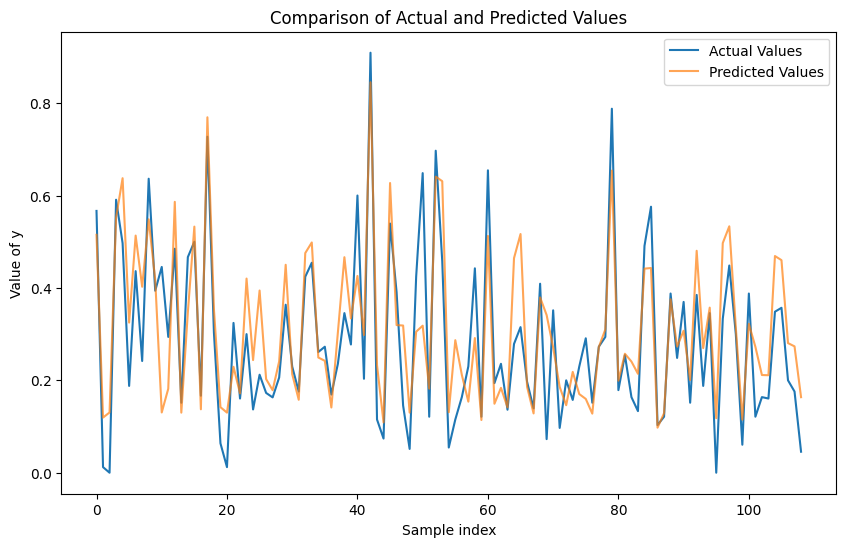

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values')
plt.plot(y_pred, label='Predicted Values', alpha=0.7)
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Sample index')
plt.ylabel('Value of y')
plt.legend()
plt.show()